In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Acetone Evaporation Rate

Assuming that all evaporation happens through gas stripping, instead of boiling, the evaporation rate can be determined based on the partial pressure of the volatile compound, temperature corrected and at a given concentration.

required equations:
 - Clausius–Clapeyron Equation
 
<p>$ P_T = e^{RT/{\Delta H_{vap}}+C}$</p>

 - Raoult's law: the partial pressure of each component of an ideal mixture of liquids is equal to the vapor pressure of the pure component multiplied by its mole fraction in the mixture
 
<p>$ p_i = p_i^* * x_i$</p>

 - Ideal gas law
 
<p>$ P*V = n*R*T$</p>
 
<p>For a metabolite "A", the evaporative transfer rate is following the equation:</p>
<p>$ N_A = K_Ga * (C_{AG} - C_{AG}^*)$</p>

In [ ]:
R = 8.314
TR, PR = 272.95, 9290 #http://www.ddbst.com/en/EED/PCP/VAP_C4.php

#Temperature range:
T0 = 273.15
dt = 80

T = np.arange(T0, T0+dt+1, 1)

def Kelvin_Celsius(t):
    """
    This function converts Temperature values from Kelvin to degrees Celsius
    """
    return t-273.15

def Celsius_Kelvin(t):
    """
    This function converts Temperature values from degrees Celsius to Kelvin
    """
    return t+273.15

/Users/phivri/opt/anaconda3/envs/cobrapy/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


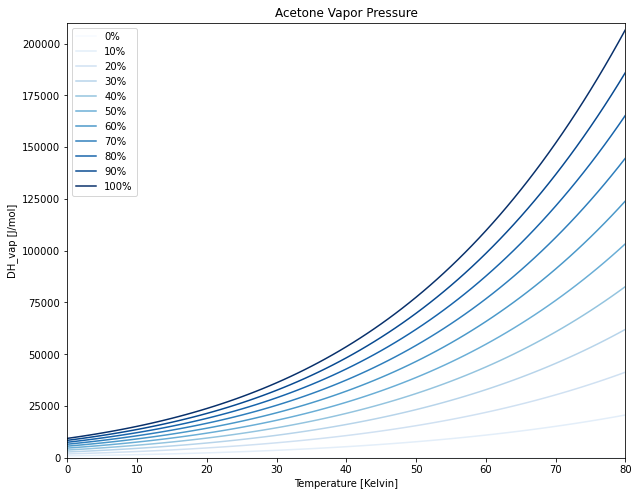

In [35]:
DH_vap = 3.1 * 10**(4) #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C67641&Mask=4#Thermo-Phase

#Calculate the constant C, the intersection with the y-axis
C = np.log(PR) + DH_vap/(R*TR)

def Pt(t,x):
    return np.exp(-DH_vap/(R*t) + C) * x

fig1 = plt.figure(figsize=(10,8))
plt.title(f"Acetone Vapor Pressure")
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 0, 210000])
plt.xlabel('Temperature [Kelvin]')
plt.ylabel('DH_vap [J/mol]')

ax1 = fig1.add_subplot(111)

ax1.plot(Kelvin_Celsius(T), Pt(T,0))
ax1.plot(Kelvin_Celsius(T), Pt(T,0.1))
ax1.plot(Kelvin_Celsius(T), Pt(T,0.2))
ax1.plot(Kelvin_Celsius(T), Pt(T,0.3))
ax1.plot(Kelvin_Celsius(T), Pt(T,0.4))
ax1.plot(Kelvin_Celsius(T), Pt(T,0.5))
ax1.plot(Kelvin_Celsius(T), Pt(T,0.6))
ax1.plot(Kelvin_Celsius(T), Pt(T,0.7))
ax1.plot(Kelvin_Celsius(T), Pt(T,0.8))
ax1.plot(Kelvin_Celsius(T), Pt(T,0.9))
ax1.plot(Kelvin_Celsius(T), Pt(T,1))

colormap = plt.cm.Blues #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i]) 
ax1.legend(["0%","10%","20%","30%","40%","50%","60%","70%","80%",'90%','100%'])

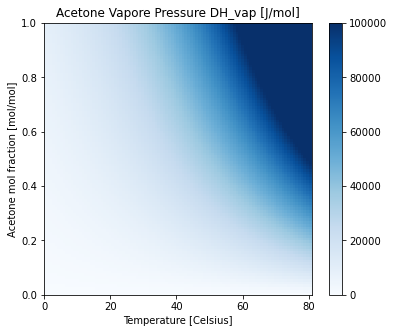

In [3]:
# generate 2 2d grids for the x & y bounds
t, x = np.meshgrid(np.linspace(T0, T0+dt+1, 100), np.linspace(0, 1, 100))

DH_vap = 3.1 * 10**(4) #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C67641&Mask=4#Thermo-Phase
R = 8.314 #[J * K^−1 * mol^−1]
TR, PR = 272.95, 9290 #http://www.ddbst.com/en/EED/PCP/VAP_C4.php

#Calculate the constant C, the intersection with the y-axis
C = np.log(PR) + DH_vap/(R*TR)

z = np.exp(-DH_vap/(R*t) + C) * x
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = 0, 100000 #-np.abs(z).max(), np.abs(z).max()

#fig = plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(6,5))

c = ax.pcolormesh(Kelvin_Celsius(t), x, z, cmap='Blues', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
plt.title(f"Acetone Vapore Pressure DH_vap [J/mol]")
plt.xlabel('Temperature [Celsius]')
plt.ylabel('Acetone mol fraction [mol/mol]')
# set the limits of the plot to the limits of the data
ax.axis([Kelvin_Celsius(t.min()), Kelvin_Celsius(t.max()),x.min(), x.max()])
fig.colorbar(c, ax=ax)

plt.show()

Fick's second law to get 
c_1 = c*p_10/H

c_1: molar concentration in the liquid
c: molar concentration in the gas
p_10: partial pressure in the gas phase
H: Henry's law constant

==> c = c_1 * H / p_10

from book: diffusion - mass transfer in fluid systems; Example 2.3-1: Diffusion across an interface

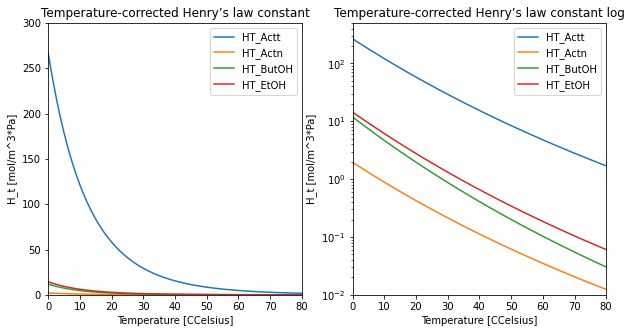

In [32]:
# Constants:
# Diffusivity coefficient:
# E.L. Cussler, Diffusion - Mass Transfer in Fluid Systems, 2nd edition - Table 5.2-1
D0_CO = 2.03*10**(-5) #[cm2/s]
D0_CO2 = 1.92*10**(-5) #[cm2/s]
D0_H2 = 4.50*10**(-5) #[cm2/s]
D0_O2 = 2.10*10**(-5) #[cm2/s]
D0_N2 = 1.88*10**(-5) #[cm2/s]
D0_Actt = 1.21 * 10**(-5) #[cm2/s]
D0_Actn = 1.16 * 10**(-5) #[cm2/s]
D0_ButOH = 0.77 * 10**(-5) #[cm2/s]
D0_EtOH = 0.77 * 10**(-5) #[cm2/s]

# NIST Chemistry WebBook: https://webbook.nist.gov
theta = 1.022 # temperature correction factor
#Henry's law constant for solubility in water at 298.15 K
H0_Actt = 4100 # [mol/kg*bar]
H0_Actn = 30 # [mol/kg*bar]
H0_ButOH = 130 # [mol/kg*bar]
H0_EtOH = 190 # [mol/kg*bar]

#temepratute correction factor k 
k_Actt = 6100 # [K]
k_Actn = 4600 # [K]
k_ButOH = 7200 # [K]
k_EtOH = 6600 # [K]

def HT_Actt(t):
    return H0_Actt * math.e**(k_Actt*(1/t-1/298.15)) * 10**3 * 10**(-5)
def HT_Actn(t):
    return H0_Actn * math.e**(k_Actt*(1/t-1/298.15)) * 10**3 * 10**(-5)
def HT_ButOH(t):
    return H0_ButOH * math.e**(k_ButOH*(1/t-1/298.15)) * 10**3 * 10**(-5)
def HT_EtOH(t):
    return H0_EtOH * math.e**(k_EtOH*(1/t-1/298.15)) * 10**3 * 10**(-5)

fig1 = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title(f"Temperature-corrected Henry’s law constant")
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 0, 300])
plt.xlabel('Temperature [Celsius]')
plt.ylabel('H_t [mol/m^3*Pa]')
plt.plot(Kelvin_Celsius(T), HT_Actt(T))
plt.plot(Kelvin_Celsius(T), HT_Actn(T))
plt.plot(Kelvin_Celsius(T), HT_ButOH(T))
plt.plot(Kelvin_Celsius(T), HT_EtOH(T))
plt.legend(["HT_Actt","HT_Actn","HT_ButOH","HT_EtOH"])

plt.subplot(1,2,2)
plt.title(f"Temperature-corrected Henry’s law constant log")
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 0.01, 500])
plt.xlabel('Temperature [Celsius]')
plt.ylabel('H_t [mol/m^3*Pa]')
plt.plot(Kelvin_Celsius(T), HT_Actt(T))
plt.plot(Kelvin_Celsius(T), HT_Actn(T))
plt.plot(Kelvin_Celsius(T), HT_ButOH(T))
plt.plot(Kelvin_Celsius(T), HT_EtOH(T))
plt.yscale("log")
plt.legend(["HT_Actt","HT_Actn","HT_ButOH","HT_EtOH"])


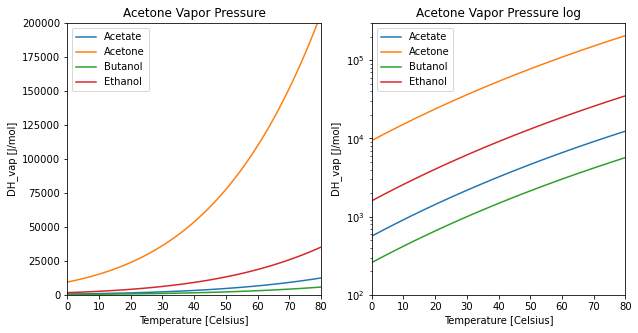

In [27]:
import matplotlib.pyplot as plt
import numpy as np

DH_vap = 3.1 * 10**(4) #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C67641&Mask=4#Thermo-Phase
R = 8.314
#T0 = 272.95

#From: http://www.ddbst.com/en/EED/PCP/PCPindex.php
P0_Actt = 1280 # [Pa] at 290.65K http://www.ddbst.com/en/EED/PCP/VAP_C84.php
P0_Actn = 9290 # [Pa] at 272.95K http://www.ddbst.com/en/EED/PCP/VAP_C4.php
P0_ButOH = 733 # [Pa] at 295.75K http://www.ddbst.com/en/EED/PCP/VAP_C39.php
P0_EtOH = 1593 # [Pa] at 273.15K http://www.ddbst.com/en/EED/PCP/VAP_C11.php

T0_Actt = 290.65 #K http://www.ddbst.com/en/EED/PCP/VAP_C84.php
T0_Actn = 272.95 #K http://www.ddbst.com/en/EED/PCP/VAP_C4.php
T0_ButOH = 295.75 #K http://www.ddbst.com/en/EED/PCP/VAP_C39.php
T0_EtOH = 273.15 #K http://www.ddbst.com/en/EED/PCP/VAP_C11.php

def Pt(P0x, T0x, t, x):
    C = np.log(P0x) + DH_vap/(R*T0x) #Calculate the constant C, the intersection with the y-axis
    return np.exp(-DH_vap/(R*t) + C) * x


fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title(f"Acetone Vapor Pressure")
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 0, 200000])
plt.xlabel('Temperature [Celsius]')
plt.ylabel('DH_vap [J/mol]')
plt.plot(Kelvin_Celsius(T), Pt(P0_Actt, T0_Actt, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_Actn, T0_Actn, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_ButOH, T0_ButOH, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_EtOH, T0_EtOH, T, 1))
plt.legend(["Acetate","Acetone","Butanol","Ethanol"])

plt.subplot(1,2,2)
plt.title(f"Acetone Vapor Pressure log")
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 100, 300000])
plt.xlabel('Temperature [Celsius]')
plt.ylabel('DH_vap [J/mol]')
plt.plot(Kelvin_Celsius(T), Pt(P0_Actt, T0_Actt, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_Actn, T0_Actn, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_ButOH, T0_ButOH, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_EtOH, T0_EtOH, T, 1))
plt.legend(["Acetate","Acetone","Butanol","Ethanol"])
plt.yscale('log')

plt.show()